In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='id')
test = pd.read_csv('../data/test.csv', index_col='id')
submission = pd.read_csv('../data/sample_submission.csv', index_col='id')

In [3]:
train.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [18]:
trainNotNull = train[train['Y18'].notnull()]
trainNotNull = trainNotNull.drop(['X04', 'X14', 'X16', 'X19', 'X36', 'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'], axis=1)
trainNotNull.head()

,X00,X01,X02,X03,X05,X06,X07,X08,X09,X10,...,X30,X31,X32,X33,X34,X35,X37,X38,X39,Y18
id,,,,,,,,,,,,,,,,,,,,,
4320,19.3,987.7,0.9,2.2,1007.7,988.0,20.8,1007.8,1007.4,0.0,...,87.6,18.0,18.7,1008.3,0.0,353.5,84.0,77.6,0.0,20.5
4321,19.0,987.6,1.9,2.2,1007.7,988.0,20.6,1007.8,1007.4,0.0,...,86.4,17.7,19.0,1008.3,0.0,303.1,84.4,79.2,0.0,20.5
4322,19.1,987.6,2.0,1.4,1007.8,988.1,20.5,1007.9,1007.4,0.0,...,85.7,17.4,19.2,1008.3,0.0,307.3,84.9,79.9,0.0,20.5
4323,19.2,987.7,1.8,1.5,1007.9,988.1,20.5,1007.9,1007.5,0.0,...,85.1,17.5,19.3,1008.4,0.0,315.6,84.9,80.7,0.0,20.5
4324,19.2,987.8,1.4,1.4,1007.9,988.1,20.5,1007.8,1007.6,0.0,...,84.9,17.4,19.5,1008.4,0.0,321.2,84.9,80.9,0.0,20.5


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [11]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgbr = XGBRegressor(n_estimators=2000, learning_rate=0.05, colsample_bylevel=1,  colsample_bytree=1, max_depth=3)
lgbmr = LGBMRegressor(colsample_bylevel= 0.5, colsample_bytree= 0.7, max_depth= 3, n_estimators= 1500)

In [51]:
columnList = trainNotNull.columns
target_var = ['Y18']
input_var = list(filter(lambda x:x != 'Y18', columnList))

X_features = trainNotNull[input_var]
y_target = trainNotNull[target_var]

In [21]:
models = [xgbr, lgbmr]

for model in models:
    get_model_cv_prediction(model, X_train, y_train)

[20:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 1.721 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 1.595 


In [19]:
trainNotNull.corr()

,X00,X01,X02,X03,X05,X06,X07,X08,X09,X10,...,X30,X31,X32,X33,X34,X35,X37,X38,X39,Y18
X00,1.000000,-0.696721,0.440166,0.300344,-0.730695,-0.701123,0.944908,-0.777789,-0.785817,-0.076724,...,-0.884103,0.937889,0.924167,-0.695749,0.612575,0.205820,-0.943287,-0.902065,0.102556,0.847230
X01,-0.696721,1.000000,-0.447364,-0.294556,0.961756,0.982726,-0.682474,0.972825,0.987940,0.175013,...,0.615949,-0.649315,-0.612120,0.970067,-0.562286,-0.048601,0.696238,0.642507,-0.093939,-0.469845
X02,0.440166,-0.447364,1.000000,0.206428,-0.479807,-0.471977,0.435400,-0.483359,-0.456901,0.074002,...,-0.383354,0.351383,0.392272,-0.468204,0.343533,-0.011653,-0.443812,-0.443446,0.210160,0.346297
X03,0.300344,-0.294556,0.206428,1.000000,-0.299974,-0.318952,0.303423,-0.326367,-0.308741,-0.021169,...,-0.287687,0.280043,0.284122,-0.318468,0.266386,0.012769,-0.299352,-0.295032,0.035041,0.234911
X05,-0.730695,0.961756,-0.479807,-0.299974,1.000000,0.964958,-0.729163,0.957938,0.954025,0.012442,...,0.595848,-0.637964,-0.625723,0.974672,-0.639190,-0.015810,0.728059,0.752785,-0.308303,-0.484978
X06,-0.701123,0.982726,-0.471977,-0.318952,0.964958,1.000000,-0.695748,0.989530,0.972398,0.153128,...,0.631506,-0.645176,-0.623381,0.981709,-0.546012,-0.004142,0.712981,0.671160,-0.130989,-0.502424
X07,0.944908,-0.682474,0.435400,0.303423,-0.729163,-0.695748,1.000000,-0.780652,-0.770638,-0.121321,...,-0.910036,0.933640,0.962667,-0.668009,0.652966,0.223357,-0.983196,-0.907242,0.131228,0.832904
X08,-0.777789,0.972825,-0.483359,-0.326367,0.957938,0.989530,-0.780652,1.000000,0.981654,0.176397,...,0.725394,-0.733466,-0.724026,0.964326,-0.572675,-0.046708,0.795950,0.735540,-0.107421,-0.592732
X09,-0.785817,0.987940,-0.456901,-0.308741,0.954025,0.972398,-0.770638,0.981654,1.000000,0.194603,...,0.713069,-0.755198,-0.713077,0.956110,-0.579263,-0.081203,0.783022,0.714861,-0.064061,-0.575146
X10,-0.076724,0.175013,0.074002,-0.021169,0.012442,0.153128,-0.121321,0.176397,0.194603,1.000000,...,0.323290,-0.223513,-0.196395,0.072602,0.256160,-0.038420,0.147585,-0.164509,0.683010,-0.161184


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B19B26E48>]],
      dtype=object)

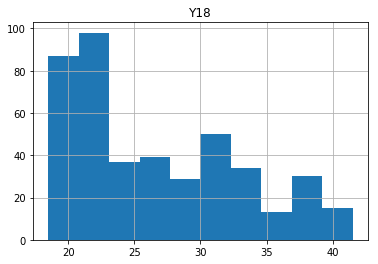

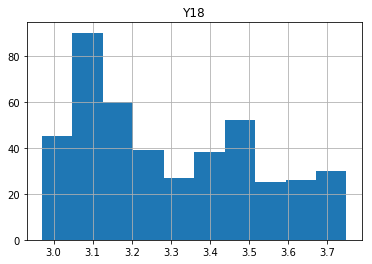

In [25]:
# X_train.hist()
y_train.hist()
y_log_train = np.log1p(y_train)
y_log_train.hist()

In [55]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    # rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)

    print('RMSE:', rmse_val)
    print('MAE:', mae_val)

In [47]:
from sklearn.model_selection import cross_val_predict
def get_model_cv_prediction_log(model, X_data, y_target_log):
    predict = cross_val_predict(model, X_data, y_target_log, cv = 5)
    # print(predict)

    origin_target = np.expm1(y_target_log)
    origin_predict = np.expm1(predict)
    print(origin_predict)

    res = rmse(origin_target, origin_predict)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(res))

In [49]:
for model in models:
    get_model_cv_prediction_log(model, X_train, y_log_train)

[20:55:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20.799786 20.560486 20.29975  20.179462 20.104683 20.268236 20.29522
 20.293114 20.403318 20.209513 20.42397  20.284851 20.355898 20.272907
 20.401531 20.64932  20.776644 20.74108

In [50]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    print('##### ', model.__class__.__name__, ' #####')
    evaluate_regr(y_test, pred)

In [58]:
y_log_target = y_log_train = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False)

[21:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
RMSE: 0.8477804930708636
MAE: 0.5487241598275991
#####  LGBMRegressor  #####
RMSE: 0.850752054922281
MAE: 0.5639206566455018


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_log_target, test_size=0.3, random_state=0)

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

[21:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
RMSE: 0.8520655327208524
MAE: 0.5533435968252334
#####  LGBMRegressor  #####
RMSE: 0.9058078435202315
MAE: 0.6187432087247272


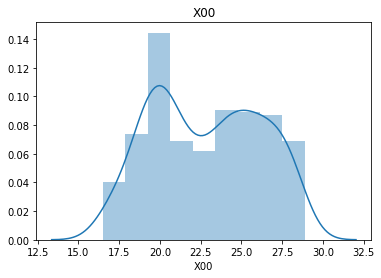

In [60]:
plt.title('X00')
sns.distplot(X_features['X00'])

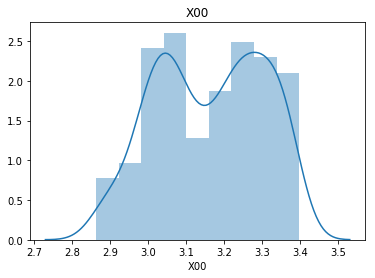

In [61]:
plt.title('X00')

log_x00 = np.log1p(X_features['X00']) 
sns.distplot(log_x00)

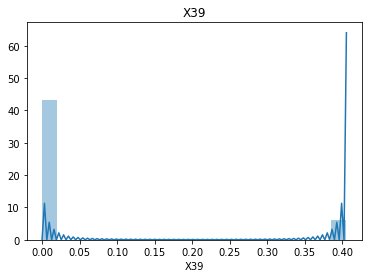

In [67]:
# plt.title('X39')
# sns.distplot(X_features['X39'])

plt.title('X39')

log_x00 = np.log1p(X_features['X39']) 
sns.distplot(log_x00)
# for col in X_features.columns:
#     plt.title(col)
#     sns.distplot(X_features[col])

In [68]:
X_features['X39']

id
4320    0.0
4321    0.0
4322    0.0
4323    0.0
4324    0.0
4325    0.0
4326    0.0
4327    0.0
4328    0.0
4329    0.0
4330    0.0
4331    0.0
4332    0.0
4333    0.0
4334    0.0
4335    0.0
4336    0.0
4337    0.0
4338    0.0
4339    0.0
4340    0.0
4341    0.0
4342    0.0
4343    0.0
4344    0.0
4345    0.0
4346    0.0
4347    0.0
4348    0.0
4349    0.0
       ... 
4722    0.5
4723    0.5
4724    0.5
4725    0.5
4726    0.5
4727    0.5
4728    0.5
4729    0.5
4730    0.5
4731    0.5
4732    0.5
4733    0.5
4734    0.5
4735    0.5
4736    0.5
4737    0.5
4738    0.5
4739    0.5
4740    0.5
4741    0.5
4742    0.5
4743    0.5
4744    0.5
4745    0.5
4746    0.5
4747    0.5
4748    0.5
4749    0.5
4750    0.5
4751    0.5
Name: X39, Length: 432, dtype: float64